## Visualization for DaskClassifier Training
https://arxiv.org/pdf/1711.00489.pdf

In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/joeholt/Developer/next-lab/adadamp-experiments/exp-dask'

In [12]:
# LOAD CSVs
dec_lr_file = './stats/decreasing-lr.csv'
dec_lr_large_file = './stats/dec-lr-512bs.csv'
inc_bs_file = './stats/increasing-bs.csv'
hybrid_1_file = './stats/hybrid.csv'
hybrid_2_file = './stats/hybrid-2.csv'
new_1_file = './stats/large-bs-0.csv'
new_2_file = './stats/large-bs-1.csv'
decreasing_lr_stats = pd.read_csv(dec_lr_file)
decreasing_lr_large_stats = pd.read_csv(dec_lr_large_file)
increasing_bs_stats = pd.read_csv(inc_bs_file)
hybrid_stats = pd.read_csv(hybrid_1_file)
hybrid2_stats = pd.read_csv(hybrid_2_file)
# class was changed since these exps were ran
new_1_stats = pd.read_csv(new_1_file)
new_1_stats = new_1_stats.rename(columns={"lr_": "partial_fit__lr", "batch_size_": "partial_fit__batch_size"})
new_2_stats = pd.read_csv(new_2_file)
new_2_stats = new_2_stats.rename(columns={"lr_": "partial_fit__lr", "batch_size_": "partial_fit__batch_size"})
decreasing_lr_large_stats = decreasing_lr_large_stats.rename(columns={"lr_": "partial_fit__lr", "batch_size_": "partial_fit__batch_size"})

In [4]:
# aggregate data
stats = [
    decreasing_lr_stats, 
    decreasing_lr_large_stats, 
    increasing_bs_stats, 
    hybrid_stats, 
    hybrid2_stats, 
    new_1_stats, 
    new_2_stats
]
labels = [
    'Decreasing LR (128bs)', 
    'Decreasing LR (512bs)', 
    'Increasing BS', 
    'Hybrid 1', 
    'Hybrid 2', 
    'Big BS 1', 
    'Big BS 2'
]

In [5]:
def plot(stats, labels, x_lbl, y_lbl, x_title, y_title, title, scale='linear'):
    """
    General plotting func
    """
    ax = stats[0].plot(x=x_lbl, y=y_lbl)
    for idx in range(1, len(stats)):
        stats[idx].plot(ax=ax, x=x_lbl, y=y_lbl)
    ax.set_xlim(0, None)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    ax.set_yscale(scale)
    ax.legend(labels)
    ax.grid()
    return ax

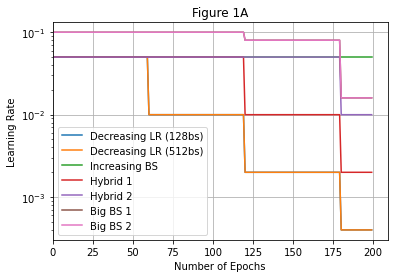

In [6]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='epoch', 
    y_lbl='partial_fit__lr', 
    x_title='Number of Epochs', 
    y_title='Learning Rate', 
    title='Figure 1A', 
    scale='log',
)

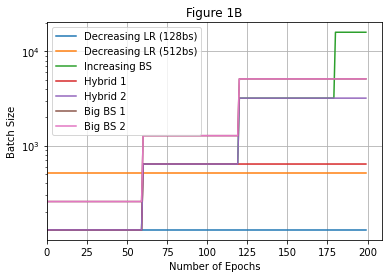

In [7]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='epoch', 
    y_lbl='partial_fit__batch_size', 
    x_title='Number of Epochs', 
    y_title='Batch Size', 
    title='Figure 1B', 
    scale='log',
)

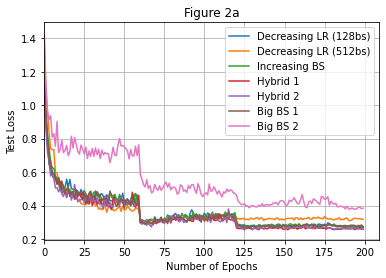

In [8]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='epoch', 
    y_lbl='score__loss', 
    x_title='Number of Epochs', 
    y_title='Test Loss', 
    title='Figure 2a'
)

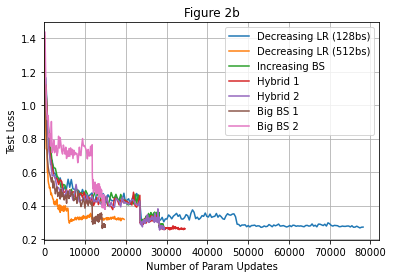

In [9]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='n_updates', 
    y_lbl='score__loss', 
    x_title='Number of Param Updates', 
    y_title='Test Loss', 
    title='Figure 2b'
)

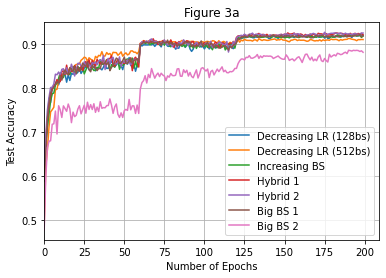

In [10]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='epoch', 
    y_lbl='score__acc', 
    x_title='Number of Epochs', 
    y_title='Test Accuracy', 
    title='Figure 3a'
)

(0.8, 0.9498549938201903)

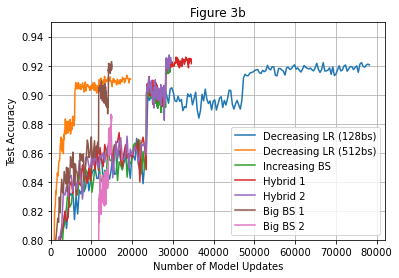

In [11]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='n_updates',
    y_lbl='score__acc',
    x_title='Number of Model Updates',
    y_title='Test Accuracy',
    title='Figure 3b'
)
ax.set_ylim(0.8, None)